*   Nama = Anggia Bagaskara
*   No HP = 081332211764

*   Tema : Popularitas Lagu Tiap Decade 
*   Alasan : Hipotesa bahwa lagu yang hits tiap decade berbeda beda
*   Link : https://en.wikipedia.org/wiki/1950s_in_music

##Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jingwuk/hacktiv8_masterclass/main/final-project-song-dataset.csv')
pd.set_option('max_rows', 6)
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,track_genre,track_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_release_year,track_release_month
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,4
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,1
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500,2014,3


##Preprocessing

In [ ]:
#df[(df['track_release_year']>=2010)&(df['track_release_year']<2020)].value_counts()

In [ ]:
#drop & cek kolom null pada dataframe
df.dropna(inplace=True)
df.isnull().sum()
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,track_genre,track_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_release_year,track_release_month
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,4
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,1
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500,2014,3


In [ ]:
#drop duplikasi data
df.drop_duplicates(inplace=True)

In [ ]:
#drop kolom yg tidak dipakai
df.drop(['track_id','track_album_id','playlist_id'], axis=1,inplace=True)
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,track_genre,track_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_release_year,track_release_month
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,6
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,12
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,4
32831,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,1
32832,Typhoon - Original Mix,Julian Calor,27,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500,2014,3


In [ ]:
df['track_release_year'].sort_values().unique()

array([1957, 1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df['track_genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [ ]:
df['track_subgenre'].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [ ]:
#asep = df[['track_name','track_artist','track_genre','track_subgenre','track_release_year','track_popularity']].sort_values(by='track_release_year').reset_index(drop=True)
#asep

In [ ]:
#melihat jumlah lagu tiap genre
#df['track_genre'].value_counts().plot(kind='bar')

In [ ]:
#dataset_popularitas_tiap_tahun = df.groupby('track_release_year')['track_popularity'].mean()
#dataset_popularitas_tiap_tahun = dataset_popularitas_tiap_tahun.to_frame().reset_index()
#dataset_popularitas_tiap_tahun.columns = ['track_release_year','Mean_Popularity']
#dataset_popularitas_tiap_tahun

In [ ]:
#dataset_popularitas_tiap_tahun['track_release_year'] = dataset_popularitas_tiap_tahun['track_release_year'].astype('category')
#dataset_popularitas_tiap_tahun.plot(kind='bar',
#                                    x='track_release_year',
#                                    y='Mean_Popularity',
#                                    figsize=(20,5),
#                                    title='Perbandingan Popularitas Track tiap Tahun')

In [ ]:
#dataset_popularitas_tiap_tahun['track_release_year'] = dataset_popularitas_tiap_tahun['track_release_year'].astype('category')
#(dataset_popularitas_tiap_tahun['track_release_year']>=1950)&(dataset_popularitas_tiap_tahun['track_release_year']<1960)

# dataset_popularitas_tiap_tahun = df[['track_release_year','track_genre','track_popularity']]
# kondisi = df.loc[(df['track_release_year']>=1960)&(df['track_release_year']<1970)]
# kondisi['track_release_year'].values[:] = 1960
# kondisi

penggantian_decade = df
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=1950)&(penggantian_decade['track_release_year']<1960),1950)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=1960)&(penggantian_decade['track_release_year']<1970),1960)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=1970)&(penggantian_decade['track_release_year']<1980),1970)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=1980)&(penggantian_decade['track_release_year']<1990),1980)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=1990)&(penggantian_decade['track_release_year']<2000),1990)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=2000)&(penggantian_decade['track_release_year']<2010),2000)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=2010)&(penggantian_decade['track_release_year']<2020),2010)
penggantian_decade['track_release_year']=penggantian_decade['track_release_year'].mask((penggantian_decade['track_release_year']>=2020)&(penggantian_decade['track_release_year']<2030),2020)

penggantian_decade

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,track_genre,track_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_release_year,track_release_month
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2010,6
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2010,12
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2010,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2010,4
32831,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2010,1
32832,Typhoon - Original Mix,Julian Calor,27,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500,2010,3


#Visualisasi

In [ ]:
dataset_jumlah_tiap_decade = penggantian_decade['track_release_year'].value_counts()
dataset_jumlah_tiap_decade = dataset_jumlah_tiap_decade.to_frame().reset_index()
dataset_jumlah_tiap_decade.columns = ['track_release_year','Jumlah_Track']
dataset_jumlah_tiap_decade

,track_release_year,Jumlah_Track
0,2010,23209
1,2000,4077
2,1990,2310
...,...,...
5,2020,785
6,1960,172
7,1950,3


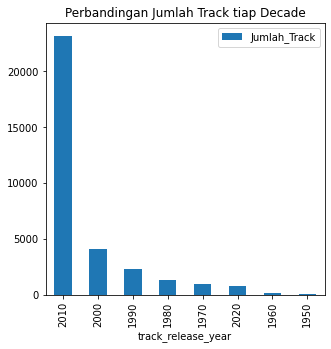

In [ ]:
dataset_jumlah_tiap_decade.plot( kind='bar',
                                      x='track_release_year',
                                      y='Jumlah_Track',
                                      figsize=(5,5),
                                      title='Perbandingan Jumlah Track tiap Decade')

In [ ]:
dataset_popularitas_tiap_decade = penggantian_decade.groupby('track_release_year')['track_popularity'].mean()
dataset_popularitas_tiap_decade = dataset_popularitas_tiap_decade.to_frame().reset_index()
dataset_popularitas_tiap_decade.columns = ['track_release_year','Mean_Popularity']
dataset_popularitas_tiap_decade

,track_release_year,Mean_Popularity
0,1950,44.333333
1,1960,49.319767
2,1970,46.665631
...,...,...
5,2000,33.639441
6,2010,43.810849
7,2020,46.461146


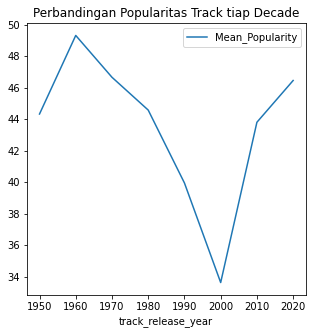

In [ ]:
dataset_popularitas_tiap_decade.plot( kind='line',
                                      x='track_release_year',
                                      y='Mean_Popularity',
                                      figsize=(5,5),
                                      title='Perbandingan Popularitas Track tiap Decade')
#plt.ylim(ymin=0, ymax=100)

Insight yang didapat : Terjadi penurunan tajam tingkat popularitas lagu pada 2000s

##Apakah Genre Berpengaruh terhadap penurunan popularitas track pada 2000s

In [ ]:
genre_sum = penggantian_decade['track_genre'][penggantian_decade['track_release_year']==2000].value_counts().to_frame().reset_index()
genre_sum.columns = ['track_genre','jumlah']
genre_sum

,track_genre,jumlah
0,rock,1014
1,r&b,973
2,rap,803
3,latin,681
4,pop,446
5,edm,160


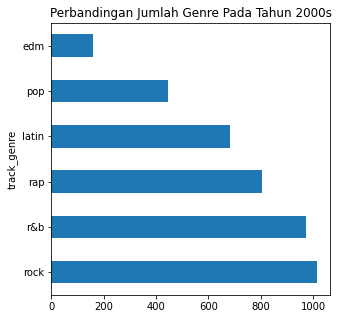

In [ ]:
genre_sum.plot( kind='barh',
                #labels=genre_sum['track_genre'],
                x='track_genre',
                y='jumlah',
                figsize=(5,5),
                #autopct='%1.1f%%',
                legend=False,
                title='Perbandingan Jumlah Genre Pada Tahun 2000s')

In [ ]:
data_2000s = penggantian_decade[penggantian_decade['track_release_year']==2000]
dataset_popularitas_genre = data_2000s.groupby('track_genre')['track_popularity'].mean()
dataset_popularitas_genre = dataset_popularitas_genre.to_frame().reset_index()
dataset_popularitas_genre.columns = ['track_genre','Mean_Popularity']
dataset_popularitas_genre

,track_genre,Mean_Popularity
0,edm,20.693750
1,latin,34.563877
2,pop,38.165919
3,r&b,29.357657
4,rap,33.337484
5,rock,37.418146


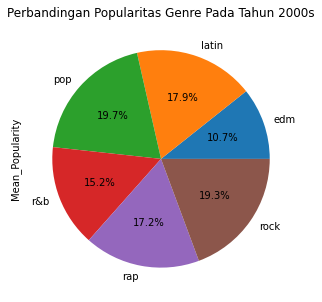

In [ ]:
dataset_popularitas_genre.plot( kind='pie',
                                labels=dataset_popularitas_genre['track_genre'],
                                y='Mean_Popularity',
                                figsize=(5,5),
                                autopct='%1.1f%%',
                                legend=False,
                                title='Perbandingan Popularitas Genre Pada Tahun 2000s')

In [ ]:
subgenre_sum = penggantian_decade['track_subgenre'][penggantian_decade['track_release_year']==2000].value_counts().to_frame().reset_index()
subgenre_sum.columns = ['track_subgenre','jumlah']
subgenre_sum

,track_subgenre,jumlah
0,southern hip hop,435
1,neo soul,404
2,new jack swing,307
...,...,...
20,pop edm,17
21,electro house,10
22,big room,9


Insight yang didapat : Genre Lagu Sangat berpengaruh pada penurunan tajam tingkat popularitas lagu pada 2000s. 

Pada grafik Jumlah Genre, jumlah lagu rock memiliki jumlah terbesar, namun pada
perbandingan popularitas genre berada dibawah lagu pop(lagu pop berada pada urutan ke 2 terbawah pada grafik jumlah genre lagu)

artinya banyak lagu bergenre rock yang tidak populer pada tahun 2000s

Begitu juga pada genre R&B

##Apakah Sub Genre Berpengaruh terhadap penurunan popularitas track pada 2000s


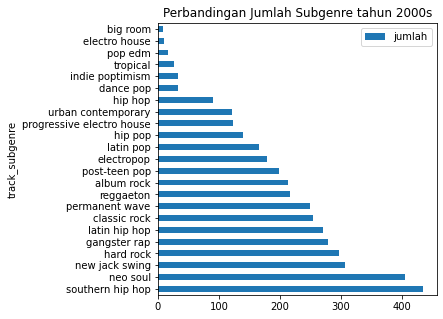

In [ ]:
subgenre_sum.plot(  kind='barh',
                    #labels=genre_popularity['track_subgenre'],
                    x='track_subgenre',
                    y='jumlah',
                    figsize=(5,5),
                    #autopct='%1.1f%%',
                    title='Perbandingan Jumlah Subgenre tahun 2000s')

In [ ]:
data_2000s = penggantian_decade[penggantian_decade['track_release_year']==2000]
subgenre_popularity = data_2000s.groupby('track_subgenre')['track_popularity'].mean().sort_values(ascending=False)
subgenre_popularity = subgenre_popularity.to_frame().reset_index()
subgenre_popularity.columns = ['track_subgenre','Mean_Popularity']
subgenre_popularity

,track_subgenre,Mean_Popularity
0,permanent wave,57.948000
1,hip hop,53.655556
2,pop edm,50.000000
...,...,...
20,neo soul,24.532178
21,new jack swing,22.325733
22,progressive electro house,12.951613


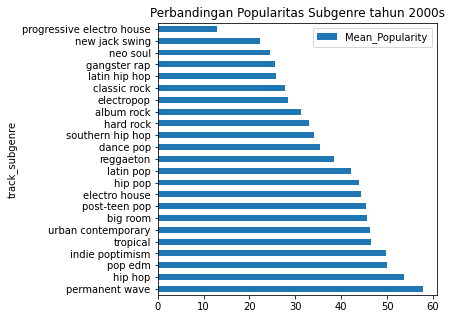

In [ ]:
subgenre_popularity.plot(  kind='barh',
                    #labels=genre_popularity['track_subgenre'],
                    x='track_subgenre',
                    y='Mean_Popularity',
                    figsize=(5,5),
                    #autopct='%1.1f%%',
                    title='Perbandingan Popularitas Subgenre tahun 2000s')